In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from solver_1DBurger import get_data_1DBurger
from time import time

def get_cmap(n, name='tab20'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(10)

plt.rcParams.update({"font.size": 30,
                     "text.usetex": True,
                     "font.family": "Times New Roman"}) # fontsize for figures

In [2]:
x0 = -3
x1 = 3
tstop = 1
nx = 1001
nt = 1000
# amp = np.array([0.7])
# width = np.array([0.9])

# amp = np.array([0.6, 1.0])
# width = np.array([0.8, 1.2])

# amp = np.arange(0.7,0.9,0.05)
# width = np.arange(0.9,1.1,0.05)

# amp = np.linspace(0.6,1.0,18)
# width = np.linspace(0.8,1.2,18)

amp = np.linspace(0.7,0.9,2)
width = np.linspace(0.9,1.1,2)

data = get_data_1DBurger(amp, width, x0=x0, x1=x1, tstop=tstop, nx=nx, nt=nt)

num_case = len(data['data'])
param = data['param']
time1 = 0
time2 = 0
time3 = 0
print(f'number of cases: {num_case}')
for i in range(num_case):
    print(f"Case {i+1}: A: {param[i][0]:.2f}, W: {param[i][1]:.2f}, t: {data['data'][i]['t'].shape}, x: {data['data'][i]['x'].shape}, dx: {data['data'][i]['dx'].shape}")
    time1 += data['data'][i]['time_fom'][0]
    time2 += data['data'][i]['time_fom'][1]
    time3 = time1 + time2
    
print(f"time for computing x: {time1/num_case:.2f} s")
print(f"time for computing dx: {time2/num_case:.2f} s")
print(f'total time: {time3/num_case:.2f} s')

/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/g/g92/he10/.conda/envs/tfvenv/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


number of cases: 4
Case 1: A: 0.70, W: 0.90, t: (1001, 1), x: (1001, 1001), dx: (1001, 1001)
Case 2: A: 0.70, W: 1.10, t: (1001, 1), x: (1001, 1001), dx: (1001, 1001)
Case 3: A: 0.90, W: 0.90, t: (1001, 1), x: (1001, 1001), dx: (1001, 1001)
Case 4: A: 0.90, W: 1.10, t: (1001, 1), x: (1001, 1001), dx: (1001, 1001)
time for computing x: 2.86 s
time for computing dx: 1.55 s
total time: 4.41 s


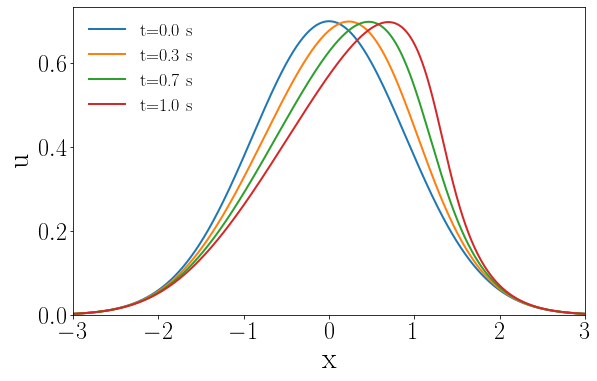

In [10]:
t = np.linspace(0,tstop,nt+1)
x = np.linspace(x0,x1,nx)
step_list = np.linspace(0,nt,4,dtype=int)

fig1 = plt.figure(figsize=(9,6))
idx = np.arange(0,t.size,50)
ax = fig1.add_subplot(111)
for i,step in enumerate(step_list):
    ax.plot(x, data['data'][0]['x'][step,:], '-', lw=2, c=cmap(i), label=f't={t[step]:.1f} s')

ax.set_xlabel('x')
ax.set_ylabel('u')
# ax.set_xticks(np.linspace(0,t.max(),5))
ax.set_xlim(x.min(),x.max())
ax.set_ylim(bottom=0)
ax.tick_params(axis='both', labelsize=24)
ax.legend(loc='upper left', frameon=False, fontsize=18)
# ax.grid()

plt.tight_layout()
plt.savefig(f"./1Dburger_physical_dynamics.png",bbox_inches='tight')

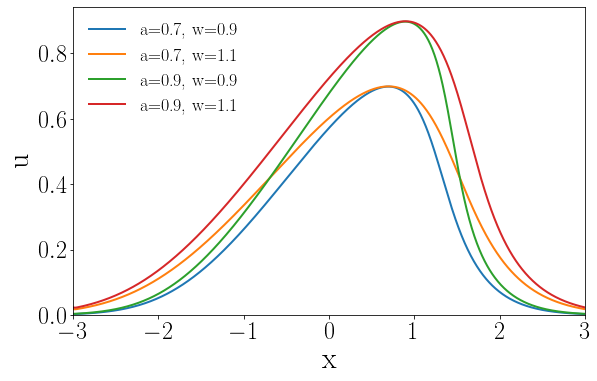

In [11]:
t = np.linspace(0,tstop,nt+1)
x = np.linspace(x0,x1,nx)
step_list = np.linspace(0,nt,4,dtype=int)

fig1 = plt.figure(figsize=(9,6))
idx = np.arange(0,t.size,50)
ax = fig1.add_subplot(111)
idx = 0
for i in range(amp.size):
    for j in range(width.size):
        ax.plot(x, data['data'][idx]['x'][-1,:], '-', lw=2, c=cmap(idx), label=f'a={amp[i]}, w={width[j]}')
        idx += 1
        
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_xlim(x.min(),x.max())
ax.set_ylim(bottom=0)
ax.tick_params(axis='both', labelsize=24)
ax.legend(loc='upper left', frameon=False, fontsize=18)

plt.tight_layout()
plt.savefig(f"./1Dburger_snapshots.png",bbox_inches='tight')

In [4]:
# save data
if num_case > 1:
    pickle.dump(data, open(f"./data/local{num_case}.p", "wb"))
else:
    pickle.dump(data, open(f"./data/local{num_case}_A{amp[0]:.2f}_W{width[0]:.2f}.p", "wb"))